In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path319 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris319.pkl'
file_path320 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris320.pkl'
file_path321 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris321.pkl'
file_path332 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris332.pkl'

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

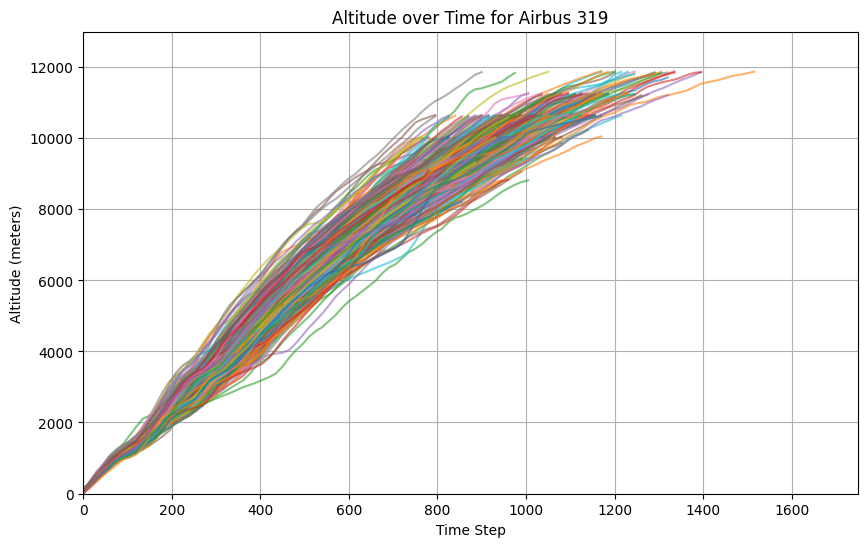

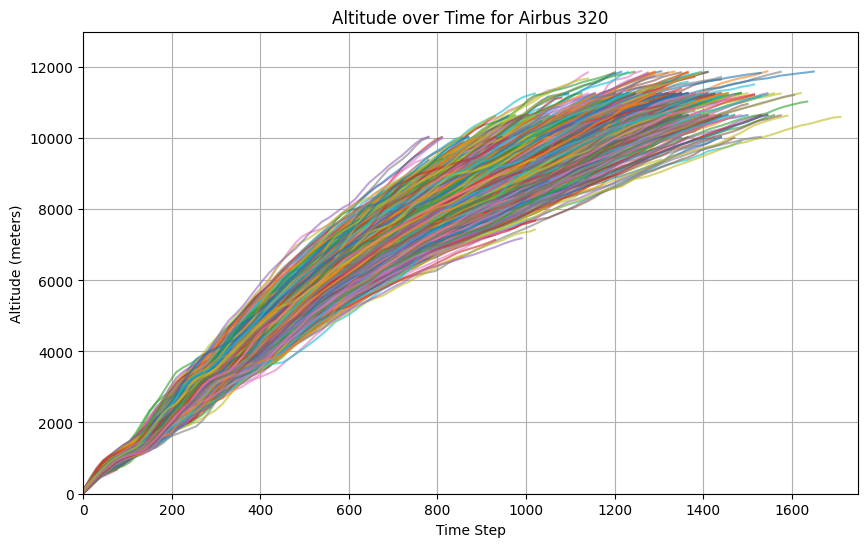

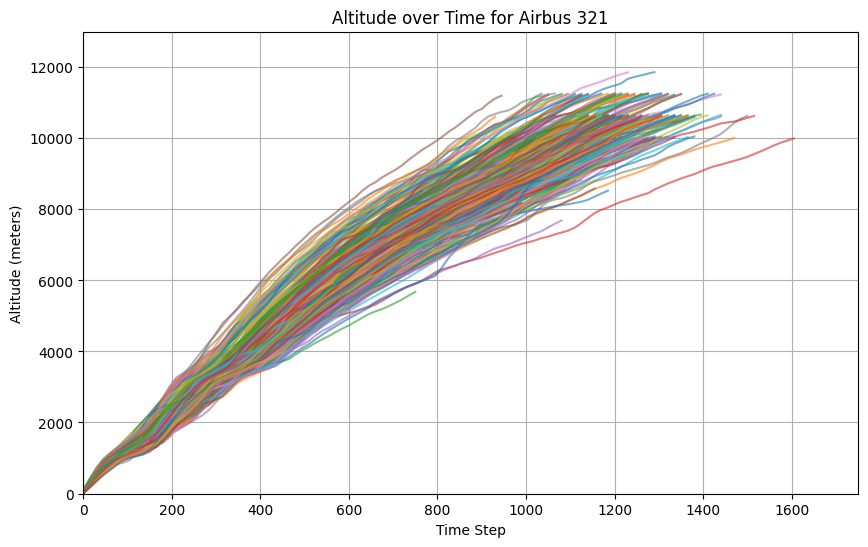

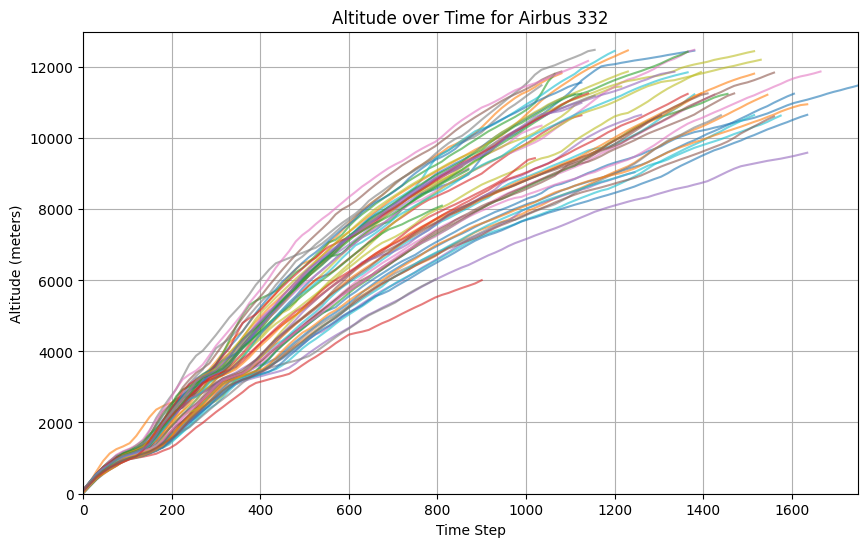

In [8]:
# Function to plot altitude over time
def plot_velocity(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['baroaltitude'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Altitude over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Altitude (meters)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 1750)  
y_limits = (-5, 13000)

# Plot for each aircraft
plot_velocity(df319, 'Airbus 319', x_limits, y_limits)
plot_velocity(df320, 'Airbus 320', x_limits, y_limits)
plot_velocity(df321, 'Airbus 321', x_limits, y_limits)
plot_velocity(df332, 'Airbus 332', x_limits, y_limits)

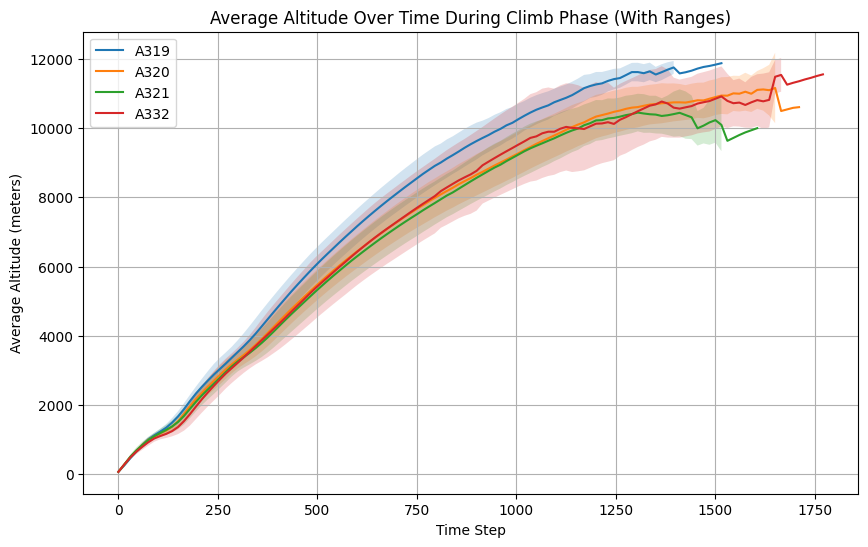

In [14]:
import matplotlib.pyplot as plt

aircraft_data = {'A319': df319, 'A320': df320, 'A321': df321, 'A332': df332}
airplane_models = ['A319', 'A320', 'A321', 'A332']

plt.figure(figsize=(10, 6))

for model in airplane_models:
    df = aircraft_data[model]
    grouped = df.groupby('timestep')['baroaltitude']
    average_altitude = grouped.mean()
    std_altitude = grouped.std()
    
    plt.plot(average_altitude, label=model)
    plt.fill_between(average_altitude.index, 
                     average_altitude - std_altitude, 
                     average_altitude + std_altitude, 
                     alpha=0.2)

plt.legend(loc='upper left')
plt.savefig('Altitude_vs_Time.png', dpi=300, bbox_inches='tight')
plt.title('Average Altitude Over Time During Climb Phase (With Ranges)')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.grid(True)
plt.show()
